# CS435 - Term Project


### In this notebook we will be analyzing the data seen in [MovieLens 25M Dataset](https://grouplens.org/datasets/movielens/25m/).


### Within this dataset, there are 6 csv files:

* **ratings.csv**
* **tags.csv**
* **movies.csv**
* **links.csv**
* **genome-scores.csv**
* **genome-tags.csv**

***More information on the data can be found [here](https://files.grouplens.org/datasets/movielens/ml-25m-README.html).***

This dataset contains information on movies from 1995 to 2019. Here we will analyze if there is any correlation between the year a movie was published, the genre of the movies, and their ratings received from users. 


## Preprocessing the data:

Before we can begin analyzing the data, we must first preprocess the data.

When looking at the data, we realized that **movie.csv** contains (movieId,title,genres) and **ratings.csv** contains (userId,movieId,rating,timestamp). With this, we figured we would find the average rating for every movie and join the datasets together.

### Creating simpleRating.csv by simplifying ratings.csv:

Despite this file containing *userId*, *movieId*, *rating*, and *timestamps*, to compute the average we really only need *movieId* and *ratings*. So the first preprocessing step we took was removing these from the dataset. We stored the processed dataset into [simpleRatings.csv](./simpleRatings.csv).


### Preprocessing simpleRatings.csv:

Within *simpleRatings.csv*, however, there are still multiple ratings per movieId. This being said, we ran another job on *simpleRatings.csv* where we combined all the values by movieId and computed the averages for each one. 

The final step for ratings.csv was to join the data with *movie.csv*. The joined datasets were stored in [movieRatings.csv](./movieRatings.csv) with the format *movieId*, *title*, *genres*, *ratings* (where *ratings* is the average for the movies).


## Final Preprocessing steps:

At this point, we have managed to combine both *ratings.csv* and *movie.csv* but we still don't have any graphable/seperable data. 

Within the dataset, the year when the movies were released were attached onto the ends of each *title*. To make it easier to analyze, we decided to create a new column in the data that represented the year of release. In addition to this, we want to preserve the number of votes used when calculating the average rating so we also attached a new column called *votes*.

The final [movieRatings.csv](./movieRatings.csv) has the format (movieId, title, genre, averageRatings, year, votes).


### Problems with the dataset--Normalizing:

When looking at the dataset, there was many inconsistencies in the format of titles. Some titles included the commas within the title (which can be problematic since we are using CSV files). Other titles also included other common deliminators (';', '|', etc.) So with these in mind, we decided to normalize the data by removing all commas from the titles directly. This meant that the only commas in the data were the ones being used as deliminators.

Another problem we noticed was some titles did not include any years. To deal with this inconsistency, these years will be seen as 0 and we will ignore them for any year analysis. 

## Reading in the data

Through preprocessing and normalizing the data, we can now compare and analyze the data easier. The following code is the packages we will be using in analysis.


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
movies  = pd.read_table(r'movieRatings.csv', sep=',')
movies = movies[movies['year'] != 0]
# original  = [str for str in movies.columns]
# reordered = [original[3]] + original[0:3] + original[4:]
# movies  = movies.reindex(columns=reordered)
print(f'The shape of our data is {movies.shape} after preprocessing and normalizing');
movies.head(10)

The shape of our data is (58675, 6) after preprocessing and normalizing


,movieId,title,genres,rating,year,votes
0,166009,The Chronicles of Melanie (2016),Drama,3.800000,2016,10
1,3492,Son of the Sheik The (1926),Adventure|Comedy|Romance,3.239726,1926,73
2,165389,Christmas Magic (2011),Children,4.000000,2011,3
3,92694,Perfect Sense (2011),Drama|Romance|Sci-Fi,3.583750,2011,400
4,120793,The Vixen (1969),Comedy,2.250000,1969,2
5,79879,Piranha (Piranha 3D) (2010),Action|Horror|Thriller,2.452998,2010,617
6,49007,Arabesque (1966),Adventure|Drama|Romance|Thriller,3.320000,1966,100
7,116112,Elsk meg i morgen (2005),Comedy,3.000000,2005,1
8,184397,Becks (2017),Drama|Romance,3.250000,2017,4
9,119687,Little Witches (1996),Horror|Thriller,2.150000,1996,10


## Movies Releases By Year (Analysis 1)

In [3]:

def plot_movies_by_count(df):
    plt.figure(figsize=(13,6))
    plt.plot(df.groupby('year').title.count(), color='darkblue')
    plt.title("Movies Made By Year")
    plt.xlabel("Years")
    plt.ylabel("Number of Movies")
    print(f"Most Recent Year: {df['year'].max()}")
    print(f"Oldest Year: {df['year'].min()}")

Most Recent Year: 2019
Oldest Year: 1874


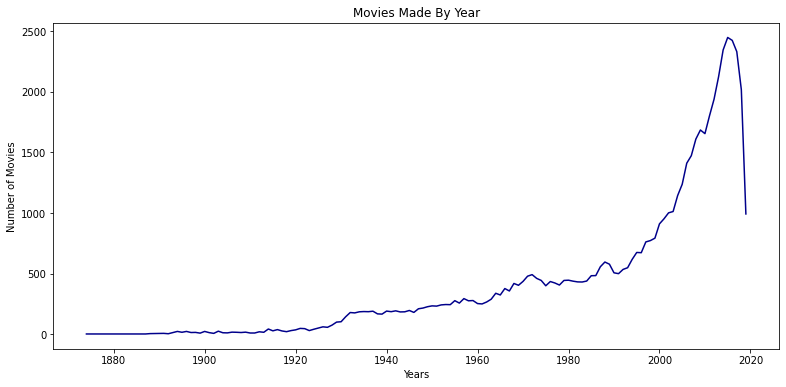

In [4]:
plot_movies_by_count(movies)

As the years increase, the number of movies produced per year also increases. Despite this, however, there seemed to have a weird drop from 2010 to 2019.

In the next sections, we will limit the scope to only include movies from 2010 to 2019 to see this weird occurance in more detail.

Most Recent Year: 2019
Oldest Year: 2010


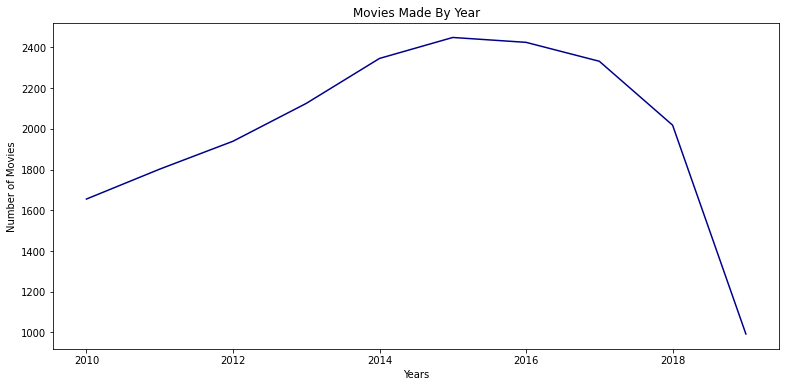

In [5]:
plot_movies_by_count(movies[movies['year'] >= 2010])

We will also plot a histogram of this data for further analysis:

In [6]:
def plot_hist_by_year(df):
    plt.figure(figsize=(13,6))
    plt.hist(df['year'], bins=range(2010, 2021), edgecolor='black', rwidth=0.66, density=True, color="darkred", align='left')
    plt.title("Movies Made By Year")
    plt.xlabel("Years")
    plt.ylabel("Percent of Movies Created")

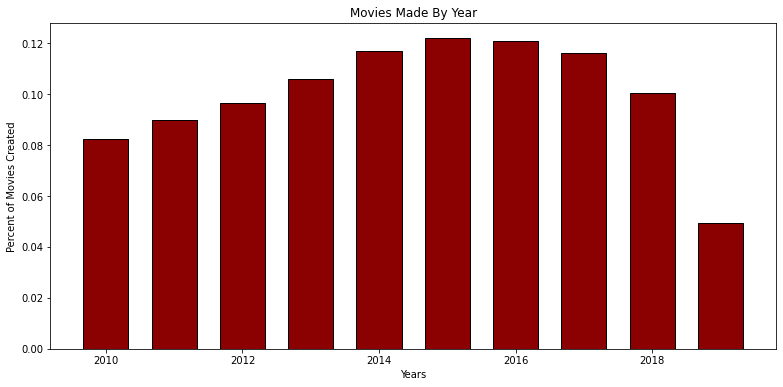

In [7]:
plot_hist_by_year(movies[movies['year'] >= 2010])

In [8]:
for i in range(2010, 2020):
    print(f"Total Movies made in {i}: {movies[movies['year'] == i].shape[0]}")

Total Movies made in 2010: 1655
Total Movies made in 2011: 1802
Total Movies made in 2012: 1939
Total Movies made in 2013: 2125
Total Movies made in 2014: 2346
Total Movies made in 2015: 2449
Total Movies made in 2016: 2425
Total Movies made in 2017: 2332
Total Movies made in 2018: 2018
Total Movies made in 2019: 992


### Analysis and Limitations:

Analyzing these results, we can observe that there is an almost linear increase in movies per year from 2010 to 2015 (with the most most being 2449 movies created in 2015). For some reason, however, the following years after 2015 (2016 -> 2019) had a sudden decrease in production. We can assume that the data in 2019 was still being gathered at the time this dataset was released but 2016-2018 still have reduced number of movies per year. 

With some research, the decrease in movie production was mainly due to China's contributions drastically going down (it is very likely that all other regions continued to increase movie production though). 

## What About Ratings? (Analysis 2)

The ratings in this dataset are user gathered ratings from users. Each user could rate any movie of their choosing on a scale of 0 to 5 stars. 

During the preprocessing and normalizing of the data, we have already grouped every users' rating to the appropriate movie, computed the average, and removed userId and timestamps from the data.

***Let's take a look at the top k movies by ratings.***

In [9]:
def get_top_k(df, k, column):
    return df.iloc[np.argsort(df[column])[-k:][::-1]]

In [10]:
# Sorts entire dataset by rating.
movies_by_rating = get_top_k(movies, len(movies), 'rating')
print(f"Number of movies with average rating 5.0: {len(movies_by_rating[movies_by_rating['rating'] == 5.0])}")
movies_by_rating.head(5)

Number of movies with average rating 5.0: 828


,movieId,title,genres,rating,year,votes
37417,206721,Oblivion Verses (2018),Drama,5.0,2018,1
37717,206901,Garfield Goes Hollywood (1987),Animation|Children|Comedy,5.0,1987,1
27825,160513,$uperthief: Inside America's Biggest Bank Scor...,(no genres listed),5.0,2012,1
12847,202181,Warlock Moon (1973),Horror|Thriller,5.0,1973,1
37642,137467,Once Upon a Summer (2009),(no genres listed),5.0,2009,1


When sorting by average rating, we can see that there are 828 movies that are rated 5.0 (A perfect score). With this, however, mostly all of the top movies here have only 1 votes attached to them, ultimately creating a bias.

**Before we move forward with rating analysis, first we need to see relationship between average ratings and user votes.**

In [11]:
get_top_k(movies, len(movies), 'votes').head(10)

,movieId,title,genres,rating,year,votes
50144,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,1994,81491
38910,318,Shawshank Redemption The (1994),Crime|Drama,4.413576,1994,81482
10676,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,1994,79672
6693,593,Silence of the Lambs The (1991),Crime|Horror|Thriller,4.151341,1991,74127
42810,2571,Matrix The (1999),Action|Sci-Fi|Thriller,4.154099,1999,72674
13788,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189,1977,68717
37115,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.679175,1993,64144
49181,527,Schindler's List (1993),Drama|War,4.247579,1993,60411
38137,110,Braveheart (1995),Action|Drama|War,4.002273,1995,59184
41555,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.228311,1999,58773


Above is the top 10 movies with the most votes(most popular movies). 

With this, however, the most popular doesn't necessarily mean the highest rated movies. Below we can see the relationship between votes and average ratings. 

In [12]:
def plot_scatter_rating_votes(df):
    plt.figure(figsize=(13,6))
    plt.scatter(x=df['rating'], y=df['votes'], alpha=0.5, color='teal')
    plt.xlabel('Average Ratings')
    plt.ylabel('Number of Votes')

Average Rating: 3.071372070642011
Average Votes: 425.87737537281635


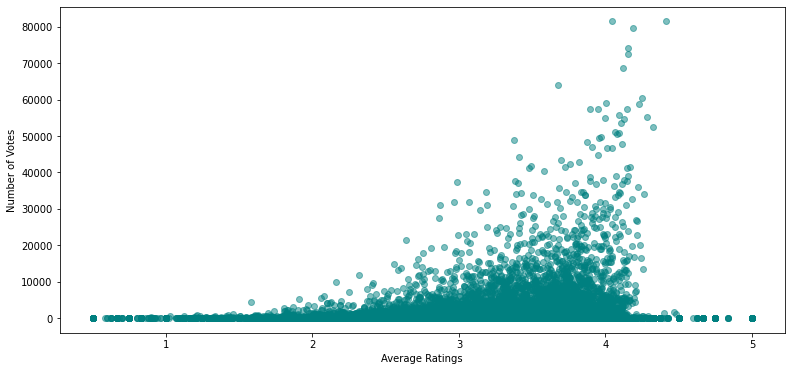

In [13]:
print(f"Average Rating: {np.mean(movies['rating'])}")
print(f"Average Votes: {np.mean(movies['votes'])}")
plot_scatter_rating_votes(movies)

Taking a look at this scatter plot, we can see that most movies above a 4.2 rating and less than 1.5 rating have only a couple votes, ultimately making these points outliers.

Since the number of votes can be used to indicate popularity of a movie, we should use the data that has a significant number of votes to determine the top rated movies. To remove the outliers here, we will only look at movies that have more than k votes where k will be [425, 2,000, and 70,000] votes.

We use 425 here because that is the mean number of votes in this dataset, 2000 because it is a number that we think will eliminate any skewness based on the plot above, and 70,000 as one of the limits because there are only 5 movies that satisfy this condition.


In [14]:
def votes_above_k(df, k):
    newDF = df[df['votes'] >= k]
    return get_top_k(newDF, len(newDF), 'rating')

In [28]:
votes_above_k(movies_by_rating, 425).head(10)

,movieId,title,genres,rating,year,votes
53524,171011,Planet Earth II (2016),Documentary,4.483096,2016,1124
53521,159817,Planet Earth (2006),Documentary,4.464797,2006,1747
38910,318,Shawshank Redemption The (1994),Crime|Drama,4.413576,1994,81482
48259,170705,Band of Brothers (2001),Action|Drama|War,4.398599,2001,1356
31084,858,Godfather The (1972),Crime|Drama,4.324336,1972,52498
28701,179135,Blue Planet II (2017),Documentary,4.289833,2017,659
7568,50,Usual Suspects The (1995),Crime|Mystery|Thriller,4.284353,1995,55366
48886,1221,Godfather: Part II The (1974),Crime|Drama,4.261758,1974,34188
33687,163809,Over the Garden Wall (2013),Adventure|Animation|Drama,4.258242,2013,546
29218,2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,4.254769,1954,13367


In [16]:
votes_above_k(movies_by_rating, 2000).head(10)

,movieId,title,genres,rating,year,votes
38910,318,Shawshank Redemption The (1994),Crime|Drama,4.413576,1994,81482
31084,858,Godfather The (1972),Crime|Drama,4.324336,1972,52498
7568,50,Usual Suspects The (1995),Crime|Mystery|Thriller,4.284353,1995,55366
48886,1221,Godfather: Part II The (1974),Crime|Drama,4.261758,1974,34188
29218,2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,4.254769,1954,13367
49181,527,Schindler's List (1993),Drama|War,4.247579,1993,60411
47743,1203,12 Angry Men (1957),Drama,4.243014,1957,16569
43981,904,Rear Window (1954),Mystery|Thriller,4.237947,1954,20162
41555,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.228311,1999,58773
38722,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4.218662,1975,36058


In [27]:
votes_above_k(movies_by_rating, 70000).head(10)

,movieId,title,genres,rating,year,votes
38910,318,Shawshank Redemption The (1994),Crime|Drama,4.413576,1994,81482
10676,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,1994,79672
42810,2571,Matrix The (1999),Action|Sci-Fi|Thriller,4.154099,1999,72674
6693,593,Silence of the Lambs The (1991),Crime|Horror|Thriller,4.151341,1991,74127
50144,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,1994,81491


### Analysis and Conclusions

As we can see, as we limit our minimum number of votes, the top rated movies change. With a higher limit, we are able to analyze popularity in relation to movie ratings. Similarly, with a lower limit, we are able to see movies that have high ratings but aren't as popular. 

With this, however, we don't want to simply use the highest number of votes to determine the top movies because this will not give equal chance to some movies. The most fair way would be to find an appropriate limit to remove any outliers (We used 2000 in our case) without removing any non-outliers.

*Looking at the top 10 movies with a minimum number of votes being 2000, there seems to be some correlation between the genre and the most popular ratings. In the next section we will dive into this further.*


## Genres (Analysis 3)

So far we have only looked at the year a movie was released, the average rating, and the number of votes for each movie. In this section we will analyze if there is any relationship between the genre of the movies and the previous analysis we conducted. 

## Setting up Genre Data

Before we can analyze anything with genres, we first must preprocess the data. As previously seen, the genre column classifies the type of movie into the following types:

* Action
* Adventure
* Animation
* Children
* Comedy
* Crime
* Documentary
* Drama
* IMAX
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)

In our dataset, however, some movies contain only one genre type, while others contain multiple. The goal of the next section is to further separate the data into different columns. In these columns, let 0 represent the movie is not classified by the genre and let 1 represent the genre classifying the movie. 

*Note: We will also be removing the 'genres' column from the data*

In [18]:
def getGenreList():
    return ["Action","Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","IMAX","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western","(no genres listed)"]

def split_genres(df):
    # Return a copy instead of changing original dataframe
    copyDF = df.copy(deep=False)
    genres = getGenreList()
    
    for genre in genres:
        temp = []
        for gen in df['genres']:
            if genre in gen:
                temp.append(1)
            else:
                temp.append(0)
        copyDF[genre] = temp
        
    copyDF.drop(columns='genres', inplace=True)
    return copyDF

In [19]:
movie_genres = split_genres(movies)
print(f"The shape of new dataframe: {movie_genres.shape}")
movie_genres.head()

The shape of new dataframe: (58675, 25)


,movieId,title,rating,year,votes,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,166009,The Chronicles of Melanie (2016),3.800000,2016,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3492,Son of the Sheik The (1926),3.239726,1926,73,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,165389,Christmas Magic (2011),4.000000,2011,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,92694,Perfect Sense (2011),3.583750,2011,400,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,120793,The Vixen (1969),2.250000,1969,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**With our new dataset splitting up the genres, lets take a look at the distribution:**

In [20]:
def graph_genres_distribution(df):
    data = {}
    for genre in df.columns[5:25]:
        count = df[genre].value_counts()
        if len(count) == 2:
            data[genre] = count[1]
        else:
            data[genre] = 0
        print(f'{genre:>19}: {data[genre]:>5}')
        
    plt.figure(figsize=(14,6))
    plt.bar(x=data.keys(), height=data.values(), color='teal')
    plt.xticks(rotation=90)
    plt.xlabel('Genre')
    plt.ylabel('Number of Occurances')
    plt.title('Number of Movies by Genre')
    plt.show()

def get_genre_data(df):
    data = {}
    for genre in df.columns[5:25]:
        count = df[genre].value_counts()
        if len(count) == 2:
            data[genre] = count[1]
        else:
            data[genre] = 0
            
    return data

             Action:  6903
          Adventure:  3860
          Animation:  2909
           Children:  2862
             Comedy: 16029
              Crime:  5019
        Documentary:  5416
              Drama: 24424
               IMAX:   195
            Fantasy:  2660
          Film-Noir:   349
             Horror:  5728
            Musical:  1016
            Mystery:  2778
            Romance:  7295
             Sci-Fi:  3490
           Thriller:  8309
                War:  1770
            Western:  1156
 (no genres listed):  4324


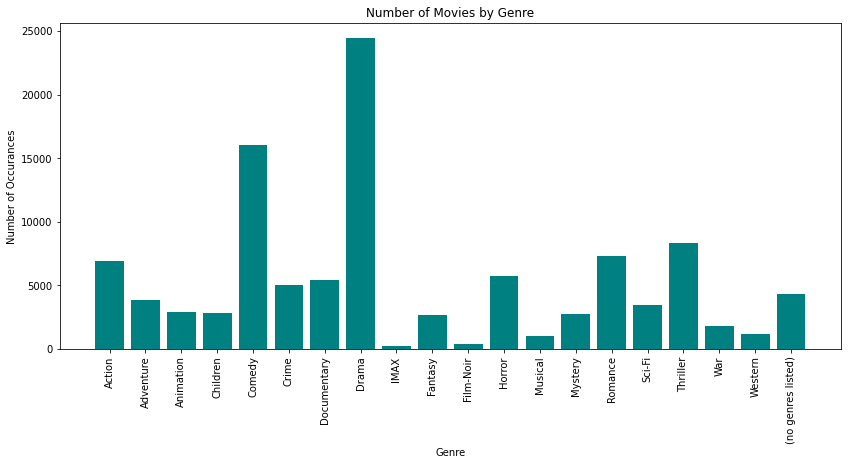

In [21]:
graph_genres_distribution(movie_genres)

Taking a look at this bargraph, we can see that 'Drama' and 'Comedy' have the most occurances in the dataset. With this, however, this only indicates that the movie industry prefers to make certain genres over other ones (possibly due to popularity). 

To see if this has anything to do with popularity, we have to isolate the popularity of movies from the sheer number of movies created to reduce any biases (since there are more Drama movies created than others, we can not accurately check most popular genre for a given year from purely number of votes).

For this, we will only consider the top 20 movies (by votes) for each year.

*Notes: Since the movie industry has changed a lot over time, we will split the data into two parts: 1980-1999 and 2000-2019. We will also display the process for one year but only display results afterwards.*

In [22]:
example_1980 = get_top_k(movie_genres[movie_genres['year'] == 1980], 20, 'votes')
example_1980.head()

,movieId,title,rating,year,votes,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
55604,1196,Star Wars: Episode V - The Empire Strikes Back...,4.144122,1980,57361,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
51937,1258,Shining The (1980),4.027864,1980,29931,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6692,2791,Airplane! (1980),3.799170,1980,20475,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43478,1220,Blues Brothers The (1980),3.800171,1980,20460,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
30864,1228,Raging Bull (1980),4.052931,1980,10712,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Above we have generated a list of movies from 1980 with 2000 or more votes. Below we will see the distribution of genres once again but for only for these movies.

             Action:     4
          Adventure:     5
          Animation:     0
           Children:     0
             Comedy:     7
              Crime:     2
        Documentary:     0
              Drama:     6
               IMAX:     0
            Fantasy:     0
          Film-Noir:     0
             Horror:     4
            Musical:     2
            Mystery:     2
            Romance:     3
             Sci-Fi:     3
           Thriller:     1
                War:     0
            Western:     0
 (no genres listed):     0


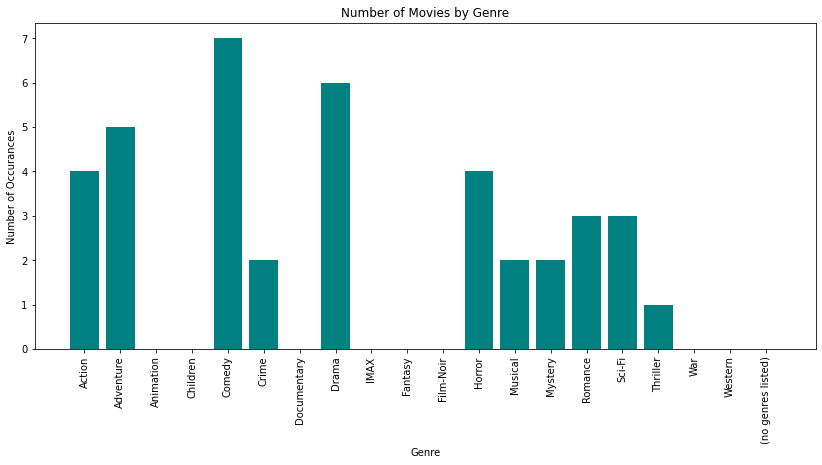

In [23]:
graph_genres_distribution(example_1980)

As we can see, Comedy is the most popular genre for 1980, so we will list it with the following format:
**1980: Comedy**

We will now repeat the process for each year without these steps.

In [24]:
def popular_genre_by_year(df, lowerBound, upperBound, rating=False):
    genreList = getGenreList()
    for i in range(lowerBound, upperBound + 1):
        top_movies = get_top_k(df[df['year'] == i], 20, 'votes')
#         top_movies = df[df['year'] == i]
#         top_movies = top_movies[top_movies['votes'] >= 2000]
#         if rating:
#             top_movies = top_movies[top_movies['rating'] > 4.0]
            
        genreCounts = {}
        for genre in genreList:
            count = top_movies[genre].value_counts()
            if len(count) == 2:
                genreCounts[genre] = count[1]
            else:
                genreCounts[genre] = 0
        print(f'{i}: {max(genreCounts, key=genreCounts.get):<}')



In [25]:
popular_genre_by_year(movie_genres, 1980, 1999)

1980: Comedy
1981: Action
1982: Drama
1983: Comedy
1984: Comedy
1985: Comedy
1986: Adventure
1987: Comedy
1988: Comedy
1989: Comedy
1990: Drama
1991: Comedy
1992: Drama
1993: Drama
1994: Comedy
1995: Thriller
1996: Thriller
1997: Drama
1998: Comedy
1999: Comedy


In [26]:
popular_genre_by_year(movie_genres, 2000, 2019)

2000: Drama
2001: Drama
2002: Action
2003: Action
2004: Drama
2005: Action
2006: Drama
2007: Drama
2008: Action
2009: Drama
2010: IMAX
2011: Drama
2012: Action
2013: IMAX
2014: Action
2015: Adventure
2016: Action
2017: Action
2018: Action
2019: Action


As we can see above, Comedy and Drama have dominated the movie industry from 1980-2009, but there seems to be and there seems to be a shift to Action and Adventure from 2010-2019. 
